In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [29]:
X, y = mglearn.datasets.load_extended_boston()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
lr.score(X_train, y_train)

0.9520519609032728

In [32]:
lr.score(X_test, y_test)

0.6074721959665773

In [33]:
# high train and low test scores means we are overfitting (too complex a model that closely follows train data)

## Ridge Regression (L2 regularization)

In [34]:
# ridge regression uses linear regression but attempts to find lowest coefficients(w) possible
# 'regularization' means explicitly restricting a model to avoid overfitting
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

In [35]:
ridge.score(X_train, y_train)

0.8857966585170941

In [36]:
ridge.score(X_test, y_test)

0.7527683481744751

In [37]:
# higher alpha value forces coefficients to move more towards zero which decreases training set performance but might help generalization
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

In [38]:
ridge10.score(X_train, y_train)

0.7882787115369614

In [39]:
ridge10.score(X_test, y_test)

0.635941148917731

In [40]:
ridge10.coef_

array([-8.11609631e-01,  6.47608896e-01, -8.09783229e-01,  3.11334709e-01,
       -6.84623747e-01,  4.38797575e+00, -1.47554474e-01, -2.44214065e+00,
        8.45915099e-01, -1.14727508e+00, -2.33162040e+00,  1.06787015e+00,
       -3.98391025e+00, -5.98636976e-01,  2.93228193e-03, -5.21253823e-01,
        1.40339673e-01, -6.45256057e-01, -7.61400539e-01, -7.47231171e-01,
       -3.86298005e-02, -8.29808059e-01, -7.52859756e-01, -6.75605899e-01,
       -8.72001488e-01, -3.23330640e-01,  1.27336327e+00, -3.37279550e-01,
        6.30682038e-02,  2.37092897e-01,  2.09805607e+00,  1.00996768e-01,
       -2.79529662e-01,  1.73222619e-01, -3.33557850e-01, -3.74226653e-01,
        6.98414808e-01, -6.96284918e-01,  7.79521010e-01,  3.74843210e-01,
       -6.24101244e-01, -7.63657605e-01,  4.35756439e-02, -1.04000852e+00,
        4.24401576e-01,  4.78687021e-01, -3.84125445e-01, -9.93802653e-02,
       -1.30226356e+00,  3.11334709e-01, -5.92097637e-01,  6.33816542e-01,
        6.66792895e-01, -

In [41]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)

In [42]:
ridge01.score(X_train, y_train)

0.9282273685001992

In [43]:
ridge01.score(X_test, y_test)

0.7722067936479814

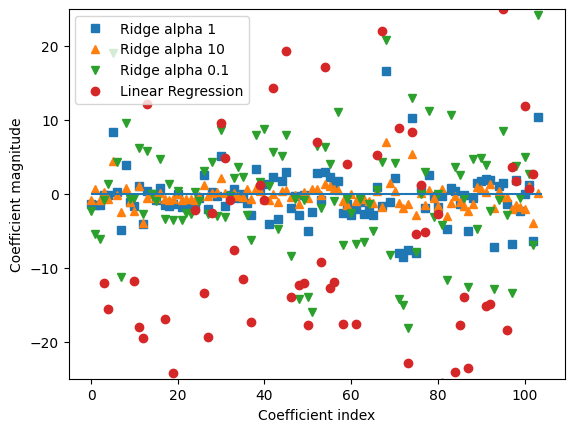

In [44]:
# alpha 0 is the same as normal Linear Regression
plt.plot(ridge.coef_, 's', label="Ridge alpha 1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha 10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha 0.1")
plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

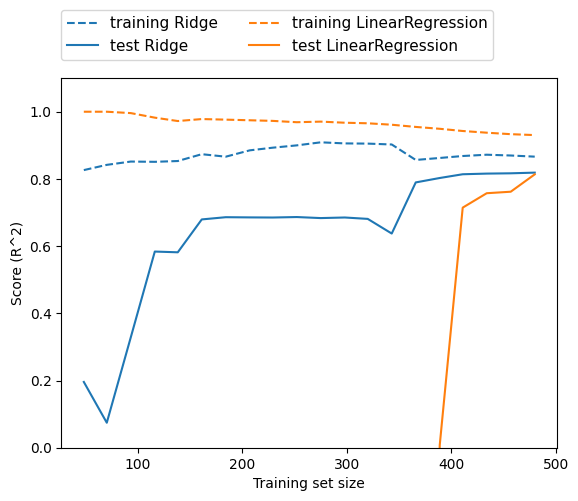

In [48]:
# given enough data, ridge and linear regression will have the same performance
mglearn.plots.plot_ridge_n_samples()
plt.show()

## Lasso (L1 regularization)

In [49]:
# in L1 some coefficents are exactly zero and hence ignored by model completely. auto feature selection
# L1 penalizes the L1 norm of the coefficient vector ie. the sum of the absolute values of the coefs
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
lasso.score(X_train, y_train)

0.29323768991114607

In [50]:
lasso.score(X_test, y_test)

0.20937503255272294

In [51]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -5.3529079 , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [53]:
# only used 4 of the features... case of underfitting
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train, y_train)
lasso001.score(X_train, y_train)

0.8962226511086497

In [54]:
lasso001.score(X_test, y_test)

0.7656571174549982

In [57]:
np.sum(lasso001.coef_ != 0)

np.int64(33)

In [69]:
# end up overfitting if we make alpha too low
lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
lasso0001.score(X_train, y_train)

0.939282766590254

In [70]:
lasso0001.score(X_test, y_test)

0.7386563657403378

In [71]:
np.sum(lasso0001.coef_ != 0)

np.int64(67)

In [75]:
lasso01 = Lasso(alpha=0.1, max_iter=1000).fit(X_train, y_train)
lasso01.score(X_test, y_test)

0.6302009976110041

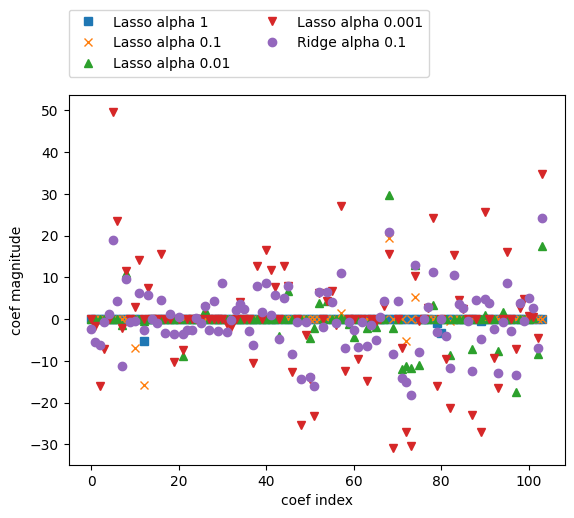

In [76]:
plt.plot(lasso.coef_, 's', label="Lasso alpha 1")
plt.plot(lasso01.coef_, 'x', label="Lasso alpha 0.1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha 0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha 0.001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha 0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("coef index")
plt.ylabel("coef magnitude")
plt.show()

## More examples on regularization

True coefficients:   [ 1.5 -2.   0.   0.   3. ]
OLS coefficients:    [ 1.529 -1.938 -0.003  0.071  2.999]
Ridge coefficients:  [ 1.350e+00 -1.766e+00 -2.000e-03  4.400e-02  2.732e+00]


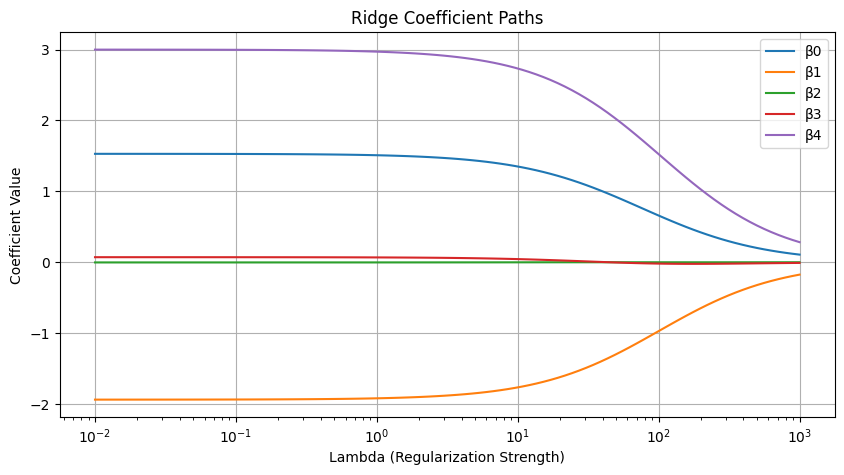

In [79]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate synthetic data
np.random.seed(42)
n_samples, n_features = 100, 5
X = np.random.randn(n_samples, n_features)
true_coef = np.array([1.5, -2.0, 0.0, 0.0, 3.0])  # Sparse true weights
y = X @ true_coef + np.random.randn(n_samples) * 0.5  # Add some noise

# 2. Ordinary Least Squares (OLS) solution
def ols(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# 3. Ridge Regression solution
def ridge(X, y, lambda_):
    n_features = X.shape[1]
    I = np.eye(n_features)
    return np.linalg.inv(X.T @ X + lambda_ * I) @ X.T @ y

# 4. Run both models
ols_coef = ols(X, y)
ridge_coef = ridge(X, y, lambda_=10)

# 5. Compare coefficients
print("True coefficients:  ", true_coef)
print("OLS coefficients:   ", np.round(ols_coef, 3))
print("Ridge coefficients: ", np.round(ridge_coef, 3))

# 6. Optional: visualize effect of regularization
lambdas = np.logspace(-2, 3, 100)
coefs = [ridge(X, y, l) for l in lambdas]
coefs = np.array(coefs)

plt.figure(figsize=(10, 5))
for i in range(n_features):
    plt.plot(lambdas, coefs[:, i], label=f'β{i}')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficient Paths')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
X

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337],
       [-0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004],
       [-0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783],
       [-0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ],
       [ 1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272],
       [ 0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491],
       [-1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124],
       [ 0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199],
       [-0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016],
       [ 0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952],
       [ 0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513],
       [-0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582],
       [ 1.35624003, -0.07201012,  1.0

In [81]:
X.shape

(100, 5)